In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('world-happiness-report.csv')
#df.head(10) #View first 10 data rows

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [ ]:
df2 = pd.read_csv('world-happiness-report-2021.csv')
df2.head(10) #View first 10 data rows

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [ ]:
# ignore  rows with null values
df2 = df2.dropna(how='any',axis=0)

# reset the index
df2 = df2.reset_index(drop=True)

In [ ]:
#statistical distribution evaluation of ladder score (could applied on all the other faactors)
ladder_score_analysis = pd.DataFrame(df2["Ladder score"])
ladder_score_analysis.describe().round(2)

,Ladder score
count,149.00
mean,5.53
std,1.07
min,2.52
25%,4.85
50%,5.53
75%,6.26
max,7.84


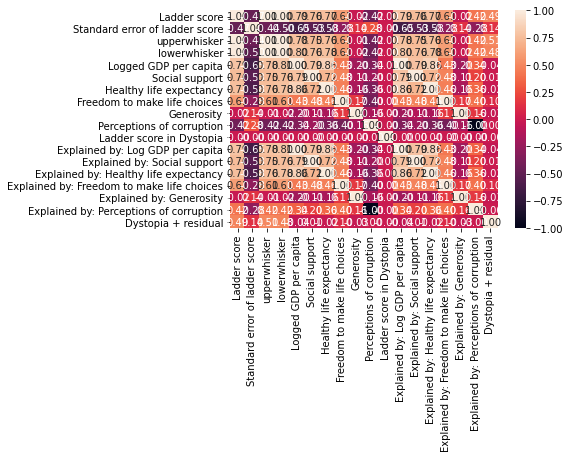

In [ ]:
# the correlation between different factors for different countries 
sb.heatmap(df2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
Iran=df[df['Country name']=='Iran']
Iran.head(10) #View first 10 data rows


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
761,Iran,2005,5.308,9.393,0.766,62.00,0.651,NaN,0.636,0.608,0.456
762,Iran,2007,5.336,9.497,0.718,62.76,0.533,0.056,0.872,0.626,0.361
763,Iran,2008,5.129,9.489,0.633,63.14,0.601,0.052,0.868,0.624,0.345
764,Iran,2011,4.768,9.547,0.582,64.14,0.798,0.200,0.665,0.578,0.359
765,Iran,2012,4.609,9.458,0.600,64.38,0.764,NaN,0.678,0.609,0.525
766,Iran,2013,5.140,9.443,0.664,64.62,0.730,0.216,0.685,0.659,0.552
767,Iran,2014,4.682,9.476,0.644,64.86,0.767,0.241,0.640,0.618,0.512
768,Iran,2015,4.750,9.449,0.572,65.10,0.780,0.176,0.699,0.645,0.520
769,Iran,2016,4.653,9.561,0.566,65.40,0.773,0.186,0.713,0.687,0.526
770,Iran,2017,4.717,9.584,0.714,65.70,0.731,0.218,0.715,0.694,0.439


In [ ]:
#calculate correlatioin between contributing factors only in one country 
Iran_corr=Iran[['Life Ladder','Log GDP per capita','Social support' , 'Healthy life expectancy at birth' ,'Freedom to make life choices', 'Generosity'  , 'Perceptions of corruption' ,'Positive affect' ,'Negative affect']]
Iran_corr.head(10) #View first 10 data rows

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
761,5.308,9.393,0.766,62.00,0.651,NaN,0.636,0.608,0.456
762,5.336,9.497,0.718,62.76,0.533,0.056,0.872,0.626,0.361
763,5.129,9.489,0.633,63.14,0.601,0.052,0.868,0.624,0.345
764,4.768,9.547,0.582,64.14,0.798,0.200,0.665,0.578,0.359
765,4.609,9.458,0.600,64.38,0.764,NaN,0.678,0.609,0.525
766,5.140,9.443,0.664,64.62,0.730,0.216,0.685,0.659,0.552
767,4.682,9.476,0.644,64.86,0.767,0.241,0.640,0.618,0.512
768,4.750,9.449,0.572,65.10,0.780,0.176,0.699,0.645,0.520
769,4.653,9.561,0.566,65.40,0.773,0.186,0.713,0.687,0.526
770,4.717,9.584,0.714,65.70,0.731,0.218,0.715,0.694,0.439


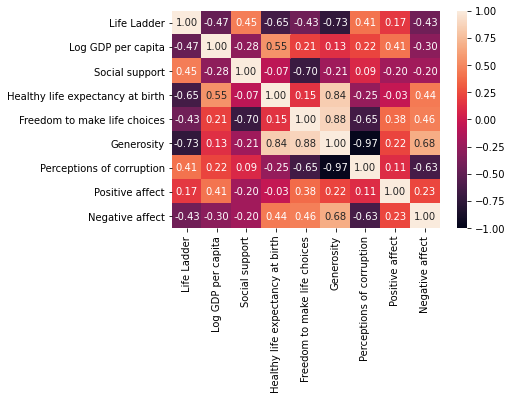

In [ ]:
sb.heatmap(Iran_corr.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

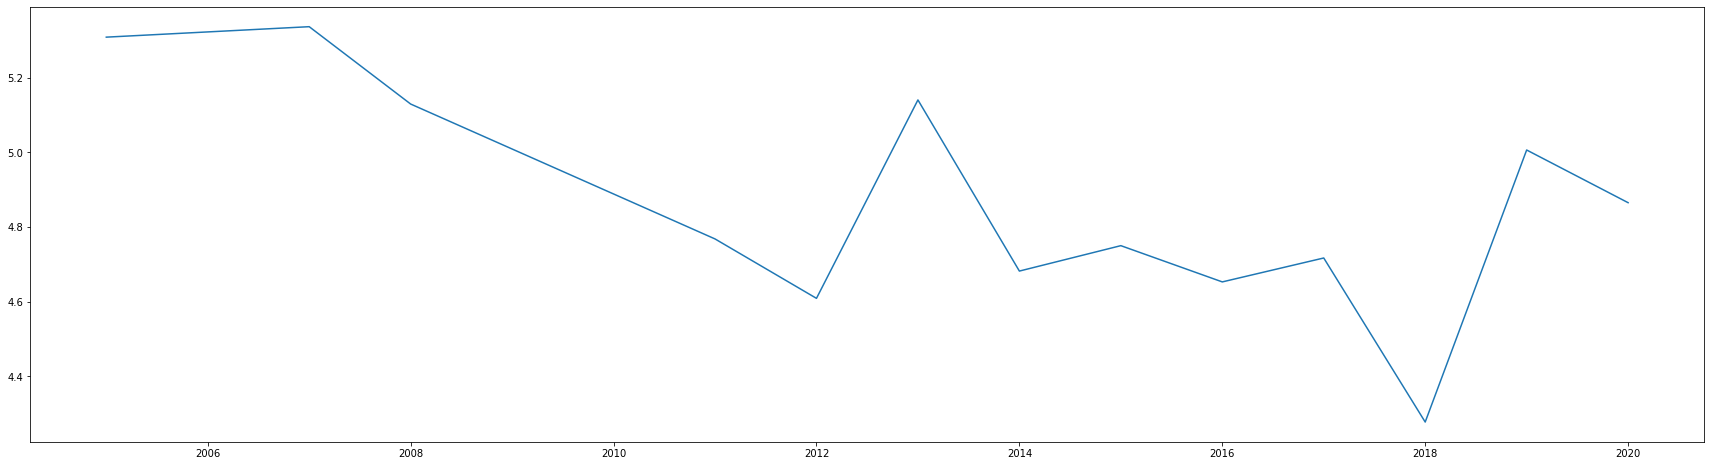

In [ ]:
#visualize how life ladder has changed in iran over years
plt.figure(figsize=(30,8))
plt.plot(Iran['year'], Iran['Life Ladder'], label='Life Ladder')


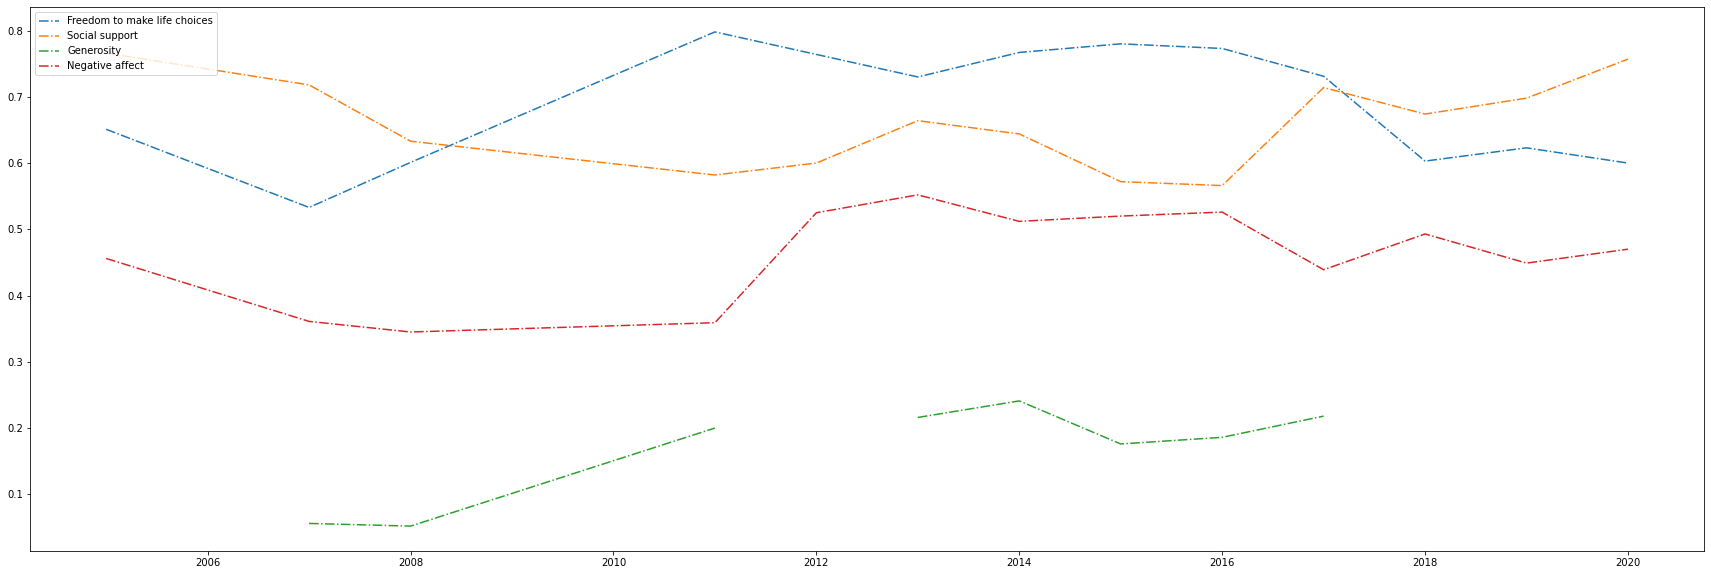

In [ ]:
#visualize the change of different factors along each other over the time
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(Iran['year'], Iran['Freedom to make life choices'],'-.', label='Freedom to make life choices')
ax.plot(Iran['year'], Iran['Social support'], '-.', label='Social support')
ax.plot(Iran['year'], Iran['Generosity'], '-.', label='Generosity')
ax.plot(Iran['year'], Iran['Negative affect'],'-.', label='Negative affect')
#other factors could already be normalized (to be placed in similar range) an plotted in this same figure 
ax.legend(loc = 'upper left')
plt.show()

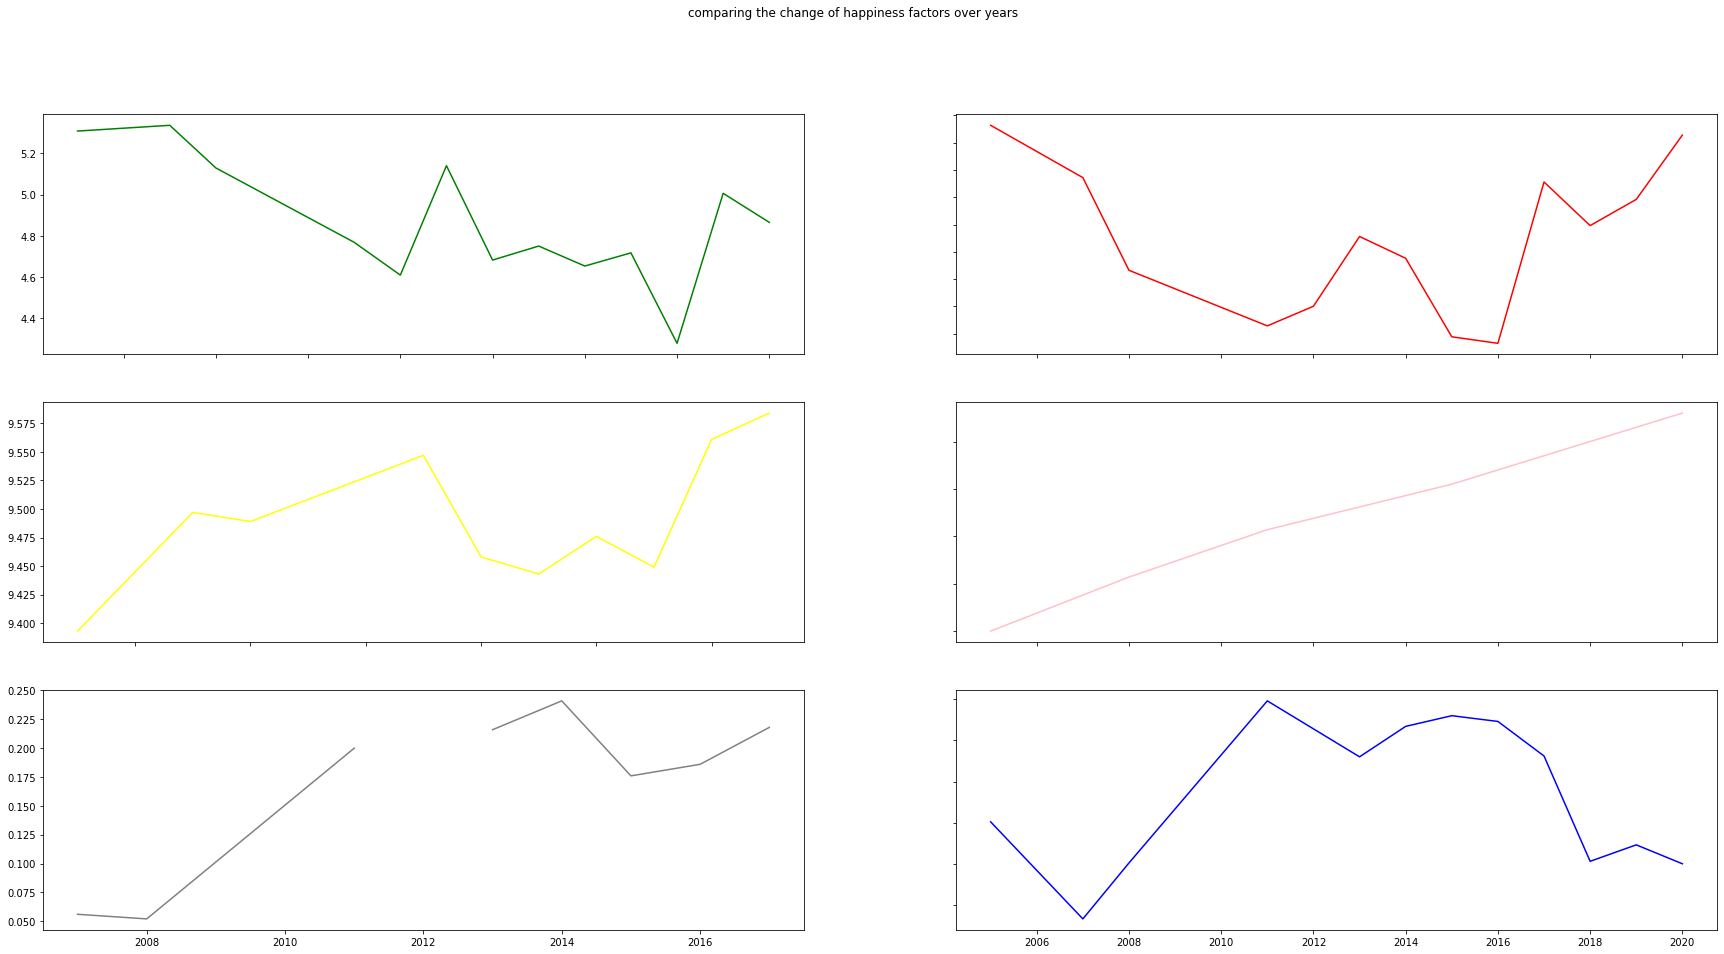

In [ ]:
#another visualization of the change of different factors in iran
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(30,15))
fig.suptitle('comparing the change of happiness factors over years')
ax1.plot(Iran['year'], Iran['Life Ladder'], label='Life Ladder' , color='green'  )
ax2.plot(Iran['year'], Iran['Social support'], label='Social support', color='red'  )
ax3.plot(Iran['year'], Iran['Log GDP per capita'], label='Log GDP per capita', color='yellow'  )
ax4.plot(Iran['year'], Iran['Healthy life expectancy at birth'], label='Healthy life expectancy at birth' , color='pink'  )
ax5.plot(Iran['year'], Iran['Generosity'], label='Generosity' , color='gray'  )
ax6.plot(Iran['year'], Iran['Freedom to make life choices'], label='Freedom to make life choices' , color='blue'  )

for ax in fig.get_axes():
    ax.label_outer()



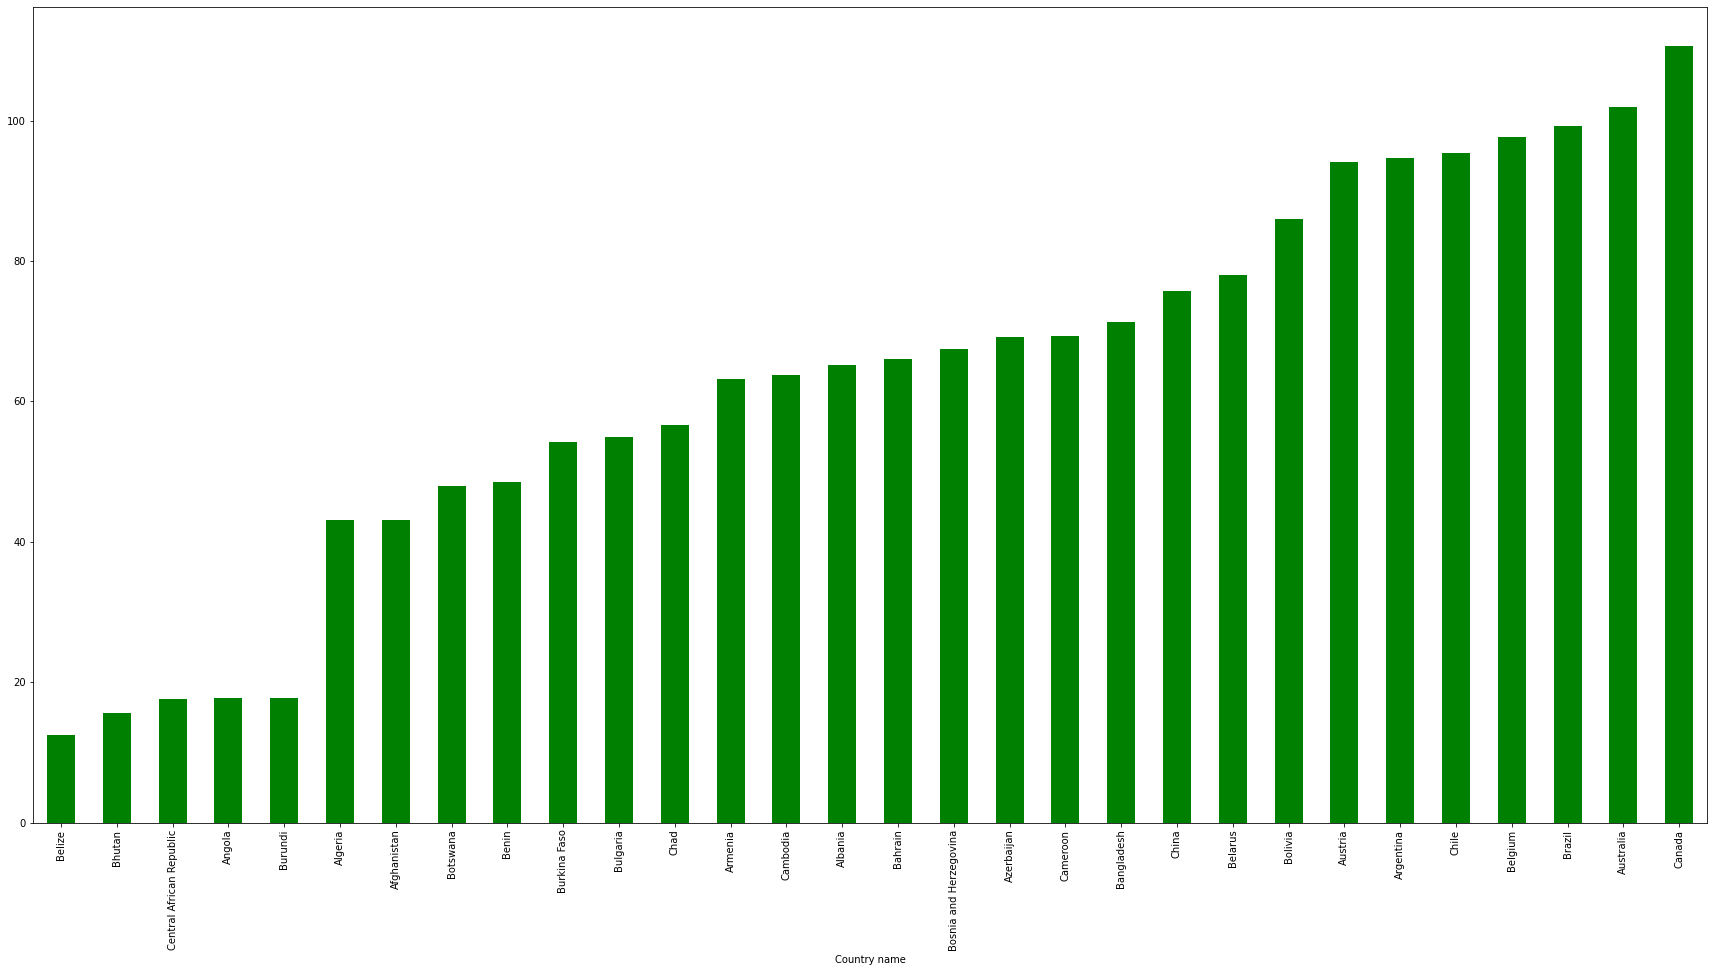

In [ ]:
#find the happiest countries 
df.groupby('Country name')['Life Ladder'].sum()[0:30].sort_values().plot(kind='bar' , figsize=(30,15), color='green')

In [ ]:
#considering that ladder score is the main factor fot happiness we can depict the distribution in the world
#another approach is to comine differnt factors with some formula 
data = dict(type = 'choropleth', 
           locations = df2['Country name'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df2['Ladder score'], 
           text = df['Country name'],
           colorbar = {'title':'Ladder score'})

layout = dict(title = 'the distribution  of happiness in the world', 
              geo = dict(showframe = True, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [data], layout=layout )
iplot(choromap3)

the below  section has error most ptobably because of faulty data. we should perform a preprocessing before training model. unvcompleted becasue of lack of time


In [ ]:
#we can train a classifier to predict the happiness level of a country using other factors ( it is the simplest approch and there is a need for accurate analysis on factors for such  a classifier)
#we are better to find the most deciding factors before this step . the selection of factors has been done randomly
predictors=["upperwhisker","lowerwhisker", "Social support" , "Freedom to make life choices", "Generosity",]
x=pd.DataFrame(df2[predictors])
y=pd.DataFrame(df2["Ladder score"])

# select some 1/4 of the data as the test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state = 42)

forest = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth = 10, min_samples_split = 0.1, min_samples_leaf = 0.001)
forest.fit(x_train,y_train)

y_train_pred_forest=forest.predict(x_train)
y_test_pred_forest=forest.predict(x_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ValueError: ignored